In [ ]:
!pip install tensorflow_hub
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/LSTM/merged.csv')

In [ ]:
# Use the bert preprocesser and bert encoder from tensorflow_hub 
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3") 
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [ ]:
df.head()

,Unnamed: 0,date_commenced,claim,verdict
0,0,1984-10-07,question agriculture came minute ago,0
1,1,1996-10-16,instead federal government tax credit pick cos...,1
2,2,1984-10-21,give demonstration say,1
3,3,2012-10-03,used consult business excuse hospital health c...,0
4,4,2016-10-09,united state united state senator,0


In [ ]:
sampleText = (df.sample(1)['claim'])
sampleText

951    yes steadfast resolved
Name: claim, dtype: object

In [ ]:
## Preprocessing
explwtext = bert_preprocess(sampleText)

In [ ]:
## Preprocessing Output Keys
explwtext.keys()

dict_keys(['input_mask', 'input_type_ids', 'input_word_ids'])

In [ ]:
## Shape of the preprocessing output
explwtext['input_word_ids'].shape

TensorShape([1, 128])

In [ ]:
## Encoding
explwtext_encoded = bert_encoder(explwtext)

In [ ]:
## Encoding Output Keys
explwtext_encoded.keys()

dict_keys(['pooled_output', 'encoder_outputs', 'default', 'sequence_output'])

In [ ]:
## Pooled Output Shape
explwtext_encoded['pooled_output'].shape

TensorShape([1, 768])

In [ ]:
explwtext_encoded['pooled_output']

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-7.54281759e-01, -1.71476826e-01,  3.12872529e-01,
         5.69465756e-01, -3.82532388e-01,  4.33725826e-02,
         8.39616597e-01,  1.04624309e-01,  2.83761710e-01,
        -9.99685228e-01,  1.68578148e-01,  1.79954052e-01,
         9.58321333e-01, -1.46932915e-01,  8.60957086e-01,
        -3.61702800e-01, -4.91867168e-03, -4.52985585e-01,
         3.32038045e-01, -6.20542228e-01,  4.74458128e-01,
         8.95793557e-01,  5.98501325e-01,  9.98673365e-02,
         2.70828575e-01,  3.95924211e-01, -4.58270788e-01,
         8.46739531e-01,  9.18225110e-01,  5.96549809e-01,
        -4.96100903e-01,  9.12715569e-02, -9.68399346e-01,
        -7.38415569e-02,  2.01899305e-01, -9.70418394e-01,
         7.55489618e-02, -6.37693167e-01,  1.05962746e-01,
         8.72271061e-02, -7.89022505e-01,  1.00911453e-01,
         9.94939387e-01, -1.53874516e-01, -9.26887442e-04,
        -2.42431492e-01, -9.99075890e-01,  1.45496383e-01,
      

In [ ]:
customText = ["The area is concerned with Armies. It is a great pleasure.", "I am greatly surprised with this"]
exCText = bert_preprocess(customText)
exCText

{'input_mask': <tf.Tensor: shape=(2, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape

In [ ]:
exCTextEncoding = bert_encoder(exCText)

In [ ]:
exCTextEncoding['pooled_output'][0]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([-0.833146  , -0.5324472 , -0.95144576,  0.7921877 ,  0.7292997 ,
        0.00420745,  0.83142996,  0.44103655, -0.86873215, -0.9999897 ,
       -0.6529997 ,  0.9535145 ,  0.97474295,  0.7010773 ,  0.93145645,
       -0.70910925, -0.15771134, -0.69583637,  0.37727782, -0.1085068 ,
        0.71599936,  0.99999577, -0.22883746,  0.52148193,  0.53327197,
        0.9898946 , -0.768633  ,  0.9062218 ,  0.95468456,  0.7544818 ,
       -0.6458205 ,  0.3281772 , -0.9905174 , -0.30328676, -0.95043474,
       -0.98963016,  0.55633235, -0.5847217 , -0.03745032, -0.045454  ,
       -0.9131377 ,  0.4559372 ,  0.9999792 , -0.06379917,  0.518642  ,
       -0.39703533, -1.        ,  0.41722488, -0.809119  ,  0.9638133 ,
        0.9245175 ,  0.92782336,  0.23110868,  0.5200376 ,  0.5406308 ,
       -0.30294824, -0.1493521 ,  0.22565417, -0.2589997 , -0.60437995,
       -0.66821015,  0.4303673 , -0.90034467, -0.847246  ,  0.91263986,
        0.814668

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['claim'],df['verdict'], stratify=df['verdict'])

In [ ]:
X_train.head()

2617                                          drew manual
1054    would hope one thing could president recognize...
2680    american conference inter american conference ...
4437                                     surprised extent
2207                        kill bin laden crush al qaida
Name: claim, dtype: object

In [ ]:
import tensorflow as tf

input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

# BERT Preprocess and Encoder 
processed = bert_preprocess(input)
output = bert_encoder(processed)

part = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])
part = tf.keras.layers.Dense(12,activation='relu', name='hidden')(part)
part = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(part)

model = tf.keras.Model(inputs=[input],outputs=[part])

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [ ]:
len(X_train)

3699

In [ ]:
import numpy as np
X_train = np.array([np.array(val) for val in X_train])
X_test = np.array([np.array(val) for val in X_test])

In [ ]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
116/116 [==============================] - 45s 357ms/step - loss: 0.6910 - accuracy: 0.5461 - precision: 0.5455 - recall: 0.5516
Epoch 2/10
116/116 [==============================] - 40s 346ms/step - loss: 0.6605 - accuracy: 0.6045 - precision: 0.6043 - recall: 0.6047
Epoch 3/10
116/116 [==============================] - 41s 355ms/step - loss: 0.6295 - accuracy: 0.6531 - precision: 0.6509 - recall: 0.6604
Epoch 4/10
116/116 [==============================] - 40s 347ms/step - loss: 0.6110 - accuracy: 0.6713 - precision: 0.6730 - recall: 0.6658
Epoch 5/10
116/116 [==============================] - 41s 350ms/step - loss: 0.5998 - accuracy: 0.6772 - precision: 0.6737 - recall: 0.6869
Epoch 6/10
116/116 [==============================] - 41s 353ms/step - loss: 0.5908 - accuracy: 0.6856 - precision: 0.6807 - recall: 0.6988
Epoch 7/10
116/116 [==============================] - 41s 352ms/step - loss: 0.5828 - accuracy: 0.6875 - precision: 0.6856 - recall: 0.6923
Epoch 8/10
116/116 [

In [ ]:
model.evaluate(X_test, y_test)

39/39 [==============================] - 14s 347ms/step - loss: 0.5535 - accuracy: 0.7234 - precision: 0.7594 - recall: 0.6548


[0.5534830093383789,
 0.7234387397766113,
 0.7593985199928284,
 0.6547812223434448]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

39/39 [==============================] - 14s 357ms/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[488, 128],
       [213, 404]])

Text(50.722222222222214, 0.5, 'Truth')

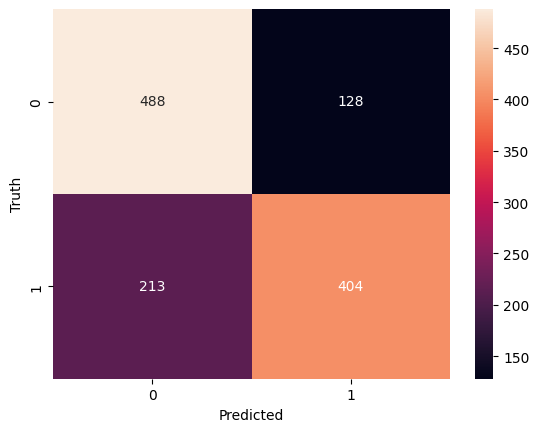

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.70      0.79      0.74       616
           1       0.76      0.65      0.70       617

    accuracy                           0.72      1233
   macro avg       0.73      0.72      0.72      1233
weighted avg       0.73      0.72      0.72      1233



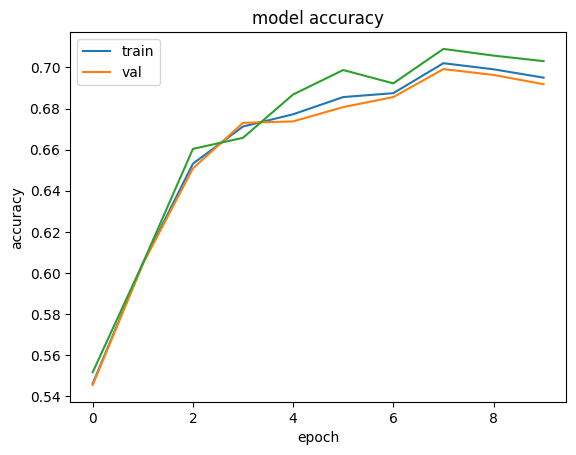

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()